In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [12]:

clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:

accuracy_score(y_test,y_pred)

0.6503496503496503

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331181533646323

In [16]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
# quantile -> most frq. bins

In [17]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [19]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [20]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [21]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [22]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [23]:
output.sample(5)
output.describe()

,age,age_trf,fare,fare_trf
count,571.000000,571.000000,571.000000,571.000000
mean,30.016935,7.140105,35.078560,7.119089
std,14.728887,4.283135,49.575809,4.265303
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,4.000000,8.050000,3.000000
50%,28.500000,7.000000,15.750000,7.000000
75%,39.000000,11.000000,34.375000,11.000000
max,80.000000,14.000000,512.329200,14.000000


In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [25]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [26]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331181533646322

In [50]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X['Fare'])
    plt.title("before fair")
    
    # plt.hist(X['Fare'])
    # plt.title("Before")

    plt.subplot(122)
    sns.kdeplot(X_trf[:,1])
    plt.title("after Fare")

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X['Age'])
    plt.title("before Age")

    
    # plt.hist(X['Fare'])
    # plt.title("Before")

    plt.subplot(122)
    sns.kdeplot(X_trf[:,0])
    plt.title("After age")
    



    plt.show()
    

0.6372848200312988


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


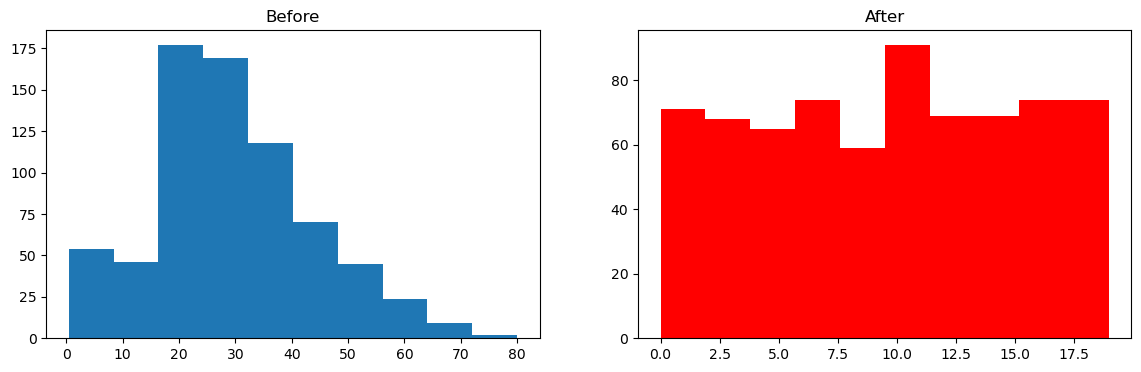

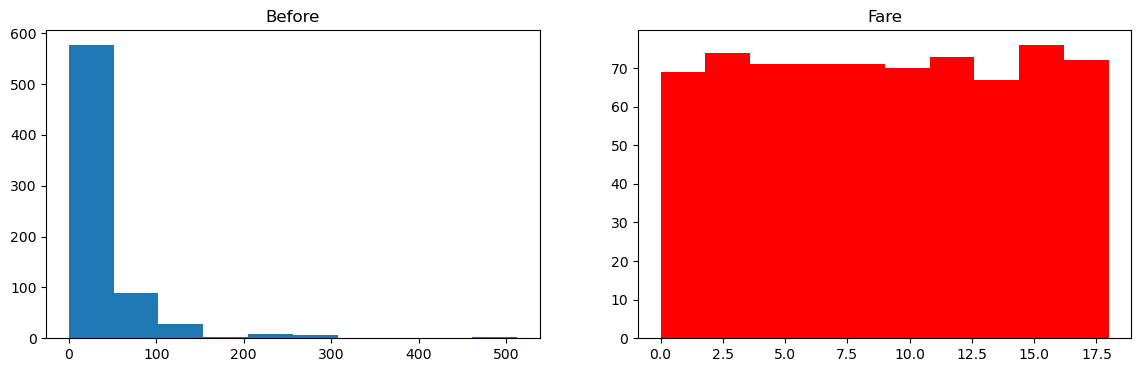

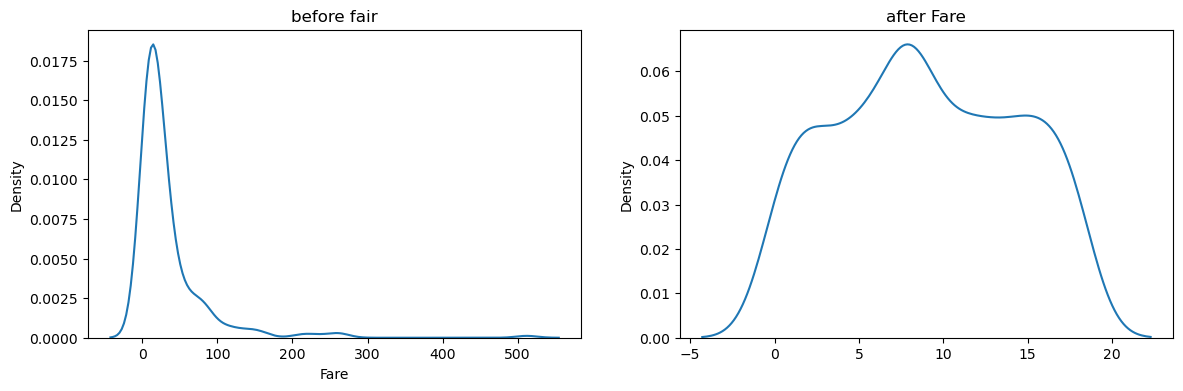

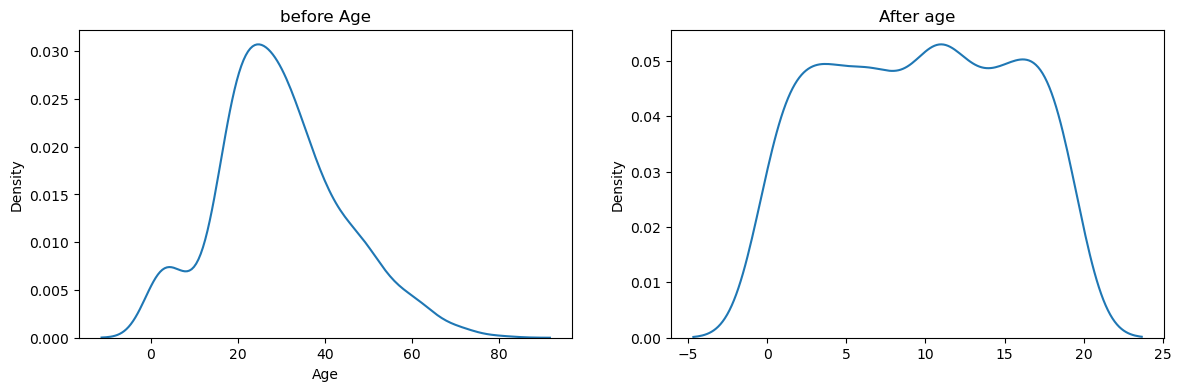

In [51]:
discretize(20,'quantile')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

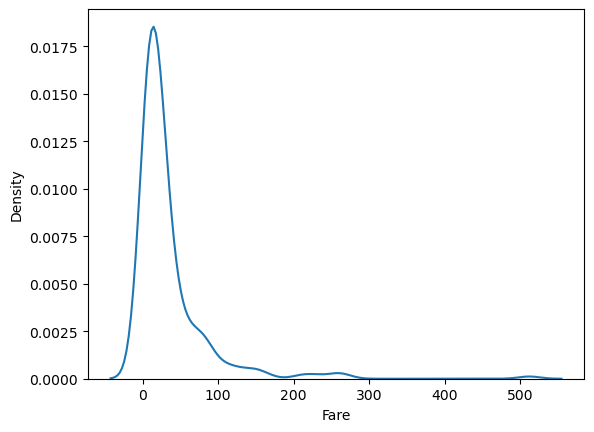

In [61]:
sns.kdeplot(X['Fare'])